In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns
from mizani.formatters import percent_format
import os
from plotnine import *
import numpy as np
import sys
import numpy as np
from datetime import datetime
from scipy.stats import norm
import statsmodels.api as sm
import statsmodels.formula.api as smf
from mizani import transforms

In [2]:
# Current script folder
current_path = os.getcwd()
dirname = "/".join(current_path.split("/")[:-2]) + "/"

# location folders
data_in = dirname + "da_data_repo/worldbank-lifeexpectancy/clean/"
data_out = dirname + "da_case_studies/ch08-life-expectancy-income/"
output = dirname + "da_case_studies/ch08-life-expectancy-income/output/"
func = dirname + "da_case_studies/ch00-tech-prep/"
sys.path.append(func)

In [3]:
# Import the prewritten helper functions 
from py_helper_functions import *

In [4]:
def poly(x, degree=1):
    """
    Fit Polynomial

    These are non orthogonal factors, but it may not matter if
    we only need this for predictions (without interpreting the
    coefficients) or visualisation.
    """
    d = {}
    for i in range(degree+1):
        if i == 1:
            d['x'] = x
        else:
            d[f'x**{i}'] = np.power(x, i)
    return pd.DataFrame(d)


In [40]:
# READ CLEAN DATA
xc = pd.read_csv(data_in + "worldbank-lifeexpectancy.csv")

In [41]:
xc

,year,countryname,countrycode,lifeexp,population,gdppc
0,1990,Albania,ALB,71.836,3.286542,4.458248
1,1990,Algeria,DZA,66.725,25.758869,10.297842
2,1990,Angola,AGO,41.696,11.848386,4.761230
3,1990,Antigua and Barbuda,ATG,71.351,0.062528,17.472946
4,1990,Argentina,ARG,71.565,32.618651,11.372823
...,...,...,...,...,...,...
5024,2017,Vietnam,VNM,76.454,94.596642,6.233485
5025,2017,West Bank and Gaza,PSE,73.646,4.454805,4.651724
5026,2017,"Yemen, Rep.",YEM,65.157,27.834821,2.404422
5027,2017,Zambia,ZMB,62.255,16.853688,3.717667


In [6]:
# select year
xc=xc.query("year==2017")

In [7]:
# GDP total, log
xc['gdptot']=xc['gdppc']*xc['population']
xc['lngdppc']=np.log(xc['gdppc'])
xc['lngdptot']=np.log(xc['gdptot'])

In [8]:
xc.loc[:,['lifeexp','gdppc','gdptot','lngdppc','lngdptot']].describe()

,lifeexp,gdppc,gdptot,lngdppc,lngdptot
count,182.000000,182.000000,182.000000,182.000000,182.000000
mean,72.307650,19.227860,629.823545,2.371420,4.351424
std,7.648017,20.386738,2218.147072,1.182575,2.186134
min,52.214000,0.670777,0.231175,-0.399318,-1.464581
25%,66.829750,4.444143,22.788201,1.491582,3.126207
50%,73.914000,12.253987,74.441676,2.505850,4.309768
75%,77.402500,27.327675,352.111662,3.307899,5.863881
max,84.680488,113.262182,21148.059722,4.729705,9.959303


In [9]:
###########################################
# Graphs 
###########################################
####################
## PER CAPITA GDP
####################

# HISTOGRAMS

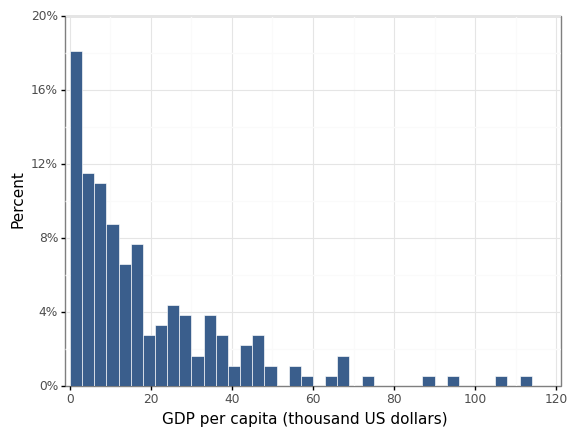

<ggplot: (312881984)>

In [10]:
ggplot(xc, aes(x="gdppc", y="stat(count)/sum(stat(count))")) + geom_histogram(
    binwidth=3,
    boundary=0,
    color="white",
    fill=color[0],
    size=0.25,
    alpha=0.8,
    show_legend=False,
    na_rm=True,
) + labs(x="GDP per capita (thousand US dollars)", y="Percent") + expand_limits(
    x=0.01, y=0.01
) + scale_x_continuous(
    expand=(0.01, 0.01), limits=(0, 120), breaks=seq(0, 121, 20)
) + scale_y_continuous(
    labels=percent_format(),
    breaks=seq(0, 0.21, 0.04),
    limits=(0, 0.2),
    expand=(0.0, 0.0),
) + theme_bw()

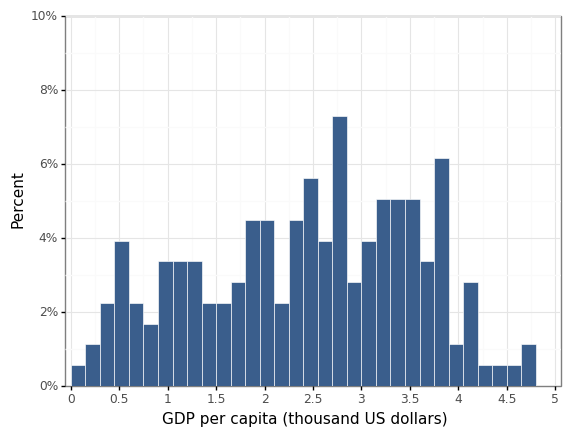

<ggplot: (312869265)>

In [11]:
ggplot(xc, aes(x="lngdppc", y="stat(count)/sum(stat(count))")) + geom_histogram(
    binwidth=0.15,
    boundary=0,
    color="white",
    fill=color[0],
    size=0.25,
    alpha=0.8,
    show_legend=False,
    na_rm=True,
) + labs(x="GDP per capita (thousand US dollars)", y="Percent") + expand_limits(
    x=0.01, y=0.01
) + scale_x_continuous(
    expand=(0.01, 0.01), limits=(0, 5), breaks=seq(0, 5.1, 0.5)
) + scale_y_continuous(
    expand=(0.0, 0.0),
    limits=(0, 0.1),
    breaks=seq(0, 0.11, 0.02),
    labels=percent_format(),
) + theme_bw()

In [12]:
# LEVEL-LEVEL REGRESSION
reg3=smf.ols(formula='lifeexp ~ gdppc',data=xc)
reg3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                lifeexp   R-squared:                       0.442
Model:                            OLS   Adj. R-squared:                  0.439
Method:                 Least Squares   F-statistic:                     142.4
Date:                Tue, 30 Mar 2021   Prob (F-statistic):           1.47e-24
Time:                        16:29:30   Log-Likelihood:                -574.97
No. Observations:                 182   AIC:                             1154.
Df Residuals:                     180   BIC:                             1160.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     67.5137      0.585    115.478      0.000      66.360      68.667
gdppc          0.2493      0.021     11.933      0.000       0.208       0.291
==============================================================================
Omnibus:                       22.094   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.566
Skew:                          -0.925   Prob(JB):                     1.70e-06
Kurtosis:                       3.285   Cond. No.                         38.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

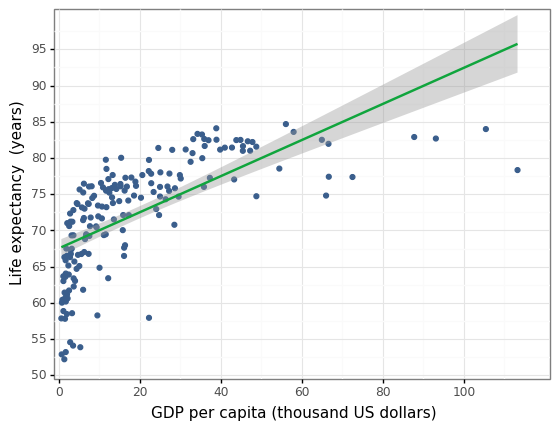

<ggplot: (313048263)>

In [13]:
ggplot(xc, aes(x="gdppc", y="lifeexp")) + geom_point(color=color[0]) + geom_smooth(
    color=color[1], method="lm"
) + coord_cartesian(xlim=(0, 120), ylim=(50, 100)) + expand_limits(
    x=0.01, y=0.01
) + scale_x_continuous(
    expand=(0.01, 0.01), limits=(0, 120), breaks=seq(0, 120, by=20)
) + scale_y_continuous(
    expand=(0.01, 0.01), breaks=seq(50, 100, by=5)
) + labs(
    x="GDP per capita (thousand US dollars)", y="Life expectancy  (years)"
) + theme_bw()

In [14]:
# LOG GDP PER CAPITA (shown on two scales)
reg4=smf.ols(formula='lifeexp ~ lngdppc',data=xc)
reg4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                lifeexp   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     382.8
Date:                Tue, 30 Mar 2021   Prob (F-statistic):           2.00e-46
Time:                        16:29:32   Log-Likelihood:                -524.28
No. Observations:                 182   AIC:                             1053.
Df Residuals:                     180   BIC:                             1059.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     59.6593      0.722     82.628      0.000      58.235      61.084
lngdppc        5.3336      0.273     19.565      0.000       4.796       5.872
==============================================================================
Omnibus:                       40.029   Durbin-Watson:                   2.238
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               68.168
Skew:                          -1.116   Prob(JB):                     1.58e-15
Kurtosis:                       5.002   Cond. No.                         6.65
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

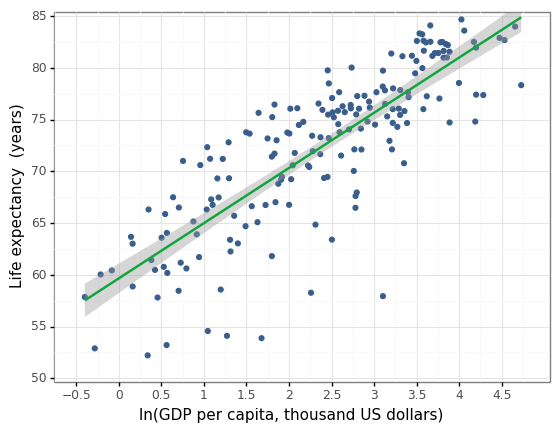

<ggplot: (313102824)>

In [15]:
ggplot(xc, aes(x="lngdppc", y="lifeexp")) + geom_point(color=color[0]) + geom_smooth(
    color=color[1], method="lm"
) + coord_cartesian(xlim=(-0.5, 4.8), ylim=(50, 85)) + scale_x_continuous(
    breaks=seq(-0.5, 4.6, by=0.5)
) + scale_y_continuous(
    expand=(0.01, 0.01), breaks=seq(50, 85.1, by=5)
) + labs(
    x="ln(GDP per capita, thousand US dollars) ", y="Life expectancy  (years)"
) + theme_bw()

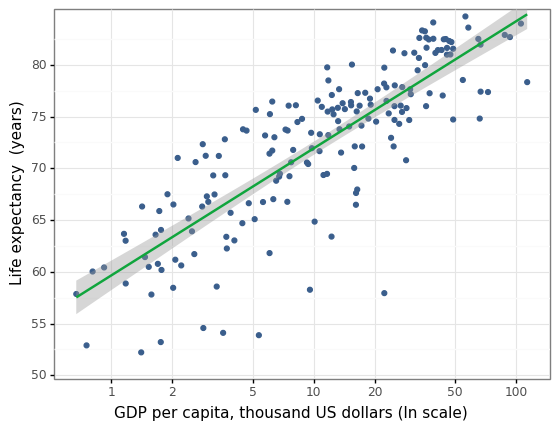

<ggplot: (312864808)>

In [16]:
ggplot(xc, aes(x="gdppc", y="lifeexp")) + geom_point(color=color[0]) + geom_smooth(
    color=color[1], method="lm"
) + coord_cartesian(ylim=(50, 85)) + scale_x_continuous(
    trans=transforms.log_trans(), breaks=(0.1, 0.5, 1, 2, 5, 10, 20, 50, 100)
) + scale_y_continuous(
    expand=(0.01, 0.01), breaks=seq(50, 85, by=5)
) + labs(
    x="GDP per capita, thousand US dollars (ln scale) ", y="Life expectancy  (years)"
) + theme_bw()

In [17]:
################################
## TOTAL GDP
################################

In [18]:
# LEVEL-LEVEL REGRESSION
reg1=smf.ols(formula='lifeexp ~ gdppc',data=xc)
reg1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                lifeexp   R-squared:                       0.442
Model:                            OLS   Adj. R-squared:                  0.439
Method:                 Least Squares   F-statistic:                     142.4
Date:                Tue, 30 Mar 2021   Prob (F-statistic):           1.47e-24
Time:                        16:29:35   Log-Likelihood:                -574.97
No. Observations:                 182   AIC:                             1154.
Df Residuals:                     180   BIC:                             1160.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     67.5137      0.585    115.478      0.000      66.360      68.667
gdppc          0.2493      0.021     11.933      0.000       0.208       0.291
==============================================================================
Omnibus:                       22.094   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.566
Skew:                          -0.925   Prob(JB):                     1.70e-06
Kurtosis:                       3.285   Cond. No.                         38.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

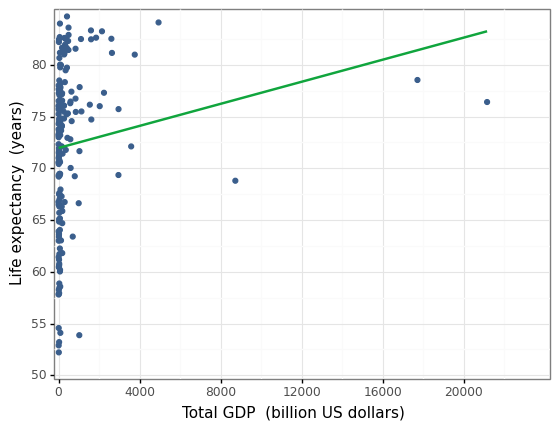

<ggplot: (313061750)>

In [19]:
ggplot(xc, aes(x="gdptot", y="lifeexp")) + geom_point(color=color[0]) + geom_smooth(
    color=color[1], method="lm",se=False
) + coord_cartesian(xlim=(0, 24000), ylim=(50, 85)) + expand_limits(
    x=0.01, y=0.01
) + scale_x_continuous(
    expand=(0.01, 0.01), limits=(0, 24000), breaks=seq(0, 24000, by=4000)
) + scale_y_continuous(
    expand=(0.01, 0.01), limits=(50, 85), breaks=seq(50, 85, by=5)
) + labs(
    x="Total GDP  (billion US dollars)", y="Life expectancy  (years)"
) + theme_bw()

In [20]:
reg2=smf.ols(formula='lifeexp ~ lngdptot',data=xc)
reg2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                lifeexp   R-squared:                       0.140
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     29.30
Date:                Tue, 30 Mar 2021   Prob (F-statistic):           1.96e-07
Time:                        16:29:37   Log-Likelihood:                -614.29
No. Observations:                 182   AIC:                             1233.
Df Residuals:                     180   BIC:                             1239.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     66.6120      1.177     56.598      0.000      64.290      68.934
lngdptot       1.3089      0.242      5.413      0.000       0.832       1.786
==============================================================================
Omnibus:                       12.032   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.170
Skew:                          -0.645   Prob(JB):                      0.00138
Kurtosis:                       2.732   Cond. No.                         11.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

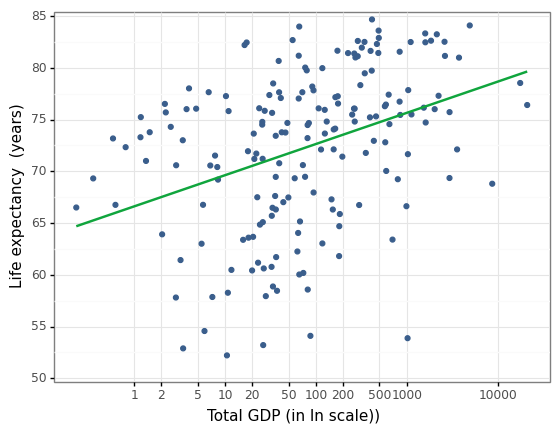

<ggplot: (313060967)>

In [21]:
ggplot(xc, aes(x="gdptot", y="lifeexp")) + geom_point(color=color[0]) + geom_smooth(
    color=color[1], method="lm", se=False
) + coord_cartesian(ylim=(50, 85)) + scale_x_continuous(
    trans=transforms.log_trans(),
    breaks=(1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 10000),
) + scale_y_continuous(
    expand=(0.01, 0.01), breaks=(50, 55, 60, 65, 70, 75, 80, 85)
) + labs(
    x="Total GDP (in ln scale))", y="Life expectancy  (years)"
) + theme_bw()

In [22]:
##########################################
# GDP PER CAPITA PIECEWISE LINEAR SPLINE 
##########################################

In [23]:
cutoff=50
cutoff_ln=np.log(cutoff)

In [24]:
reg5=smf.ols(formula="lifeexp ~ lspline(lngdppc,cutoff_ln)",data=xc)
reg5.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                lifeexp   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     195.9
Date:                Tue, 30 Mar 2021   Prob (F-statistic):           8.31e-46
Time:                        16:29:38   Log-Likelihood:                -522.47
No. Observations:                 182   AIC:                             1051.
Df Residuals:                     179   BIC:                             1061.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         59.2872      0.743     79.767      0.000      57.821      60.754
lspline(lngdppc, cutoff_ln)[0]     5.5526      0.294     18.868      0.000       4.972       6.133
lspline(lngdppc, cutoff_ln)[1]    -0.2941      2.981     -0.099      0.922      -6.177       5.588
==============================================================================
Omnibus:                       43.162   Durbin-Watson:                   2.242
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               79.564
Skew:                          -1.154   Prob(JB):                     5.28e-18
Kurtosis:                       5.273   Cond. No.                         25.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
xc['e3']=reg5.fit().resid
xc['sppred']=reg5.fit().predict()

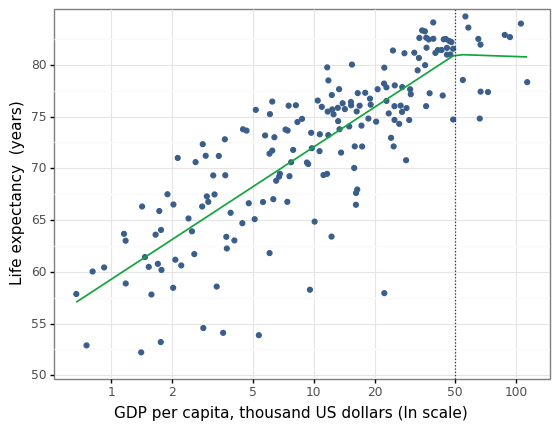

<ggplot: (313154265)>

In [26]:
ggplot(xc, aes(x="gdppc", y="lifeexp")) + geom_point(color=color[0]) + geom_line(
    xc, aes(x="gdppc", y="sppred"), color=color[1], size=0.7
) + geom_vline(
    xintercept=cutoff, color=color[2], size=0.5, linetype="dotted"
) + coord_cartesian(
    ylim=(50, 85)
) + scale_x_continuous(
    trans=transforms.log_trans(), breaks=(0.1, 0.5, 1, 2, 5, 10, 20, 50, 100)
) + scale_y_continuous(
    expand=(0.01, 0.01), breaks=seq(50, 85, by=5)
) + labs(
    x="GDP per capita, thousand US dollars (ln scale) ", y="Life expectancy  (years)"
) + theme_bw()

In [27]:
# QUADRATIC IN LEVEL-LOG REGRESSION
xc['lngdppc_sq']=xc['lngdppc'].pow(2)
reg6=smf.ols(formula='lifeexp ~ lngdppc+lngdppc_sq',data=xc)
reg6.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                lifeexp   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     192.0
Date:                Tue, 30 Mar 2021   Prob (F-statistic):           2.92e-45
Time:                        16:29:40   Log-Likelihood:                -523.75
No. Observations:                 182   AIC:                             1054.
Df Residuals:                     179   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     58.9017      1.035     56.911      0.000      56.859      60.944
lngdppc        6.3038      0.988      6.380      0.000       4.354       8.254
lngdppc_sq    -0.2200      0.215     -1.022      0.308      -0.645       0.205
==============================================================================
Omnibus:                       43.067   Durbin-Watson:                   2.252
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.274
Skew:                          -1.168   Prob(JB):                     1.66e-17
Kurtosis:                       5.176   Cond. No.                         40.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
xc['e6']=reg6.fit().resid

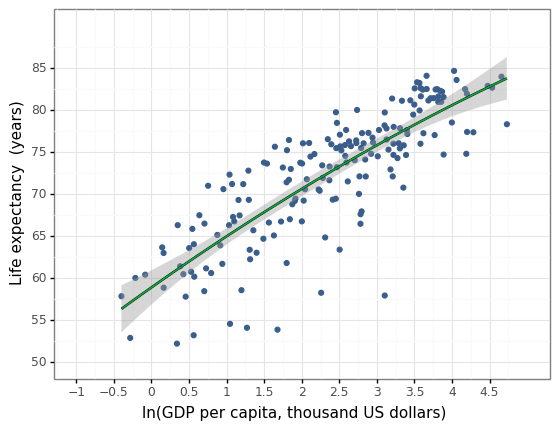

<ggplot: (313154064)>

In [29]:
ggplot(xc, aes(x="lngdppc", y="lifeexp")) + geom_point(color=color[0]) + stat_smooth(
    method="lm", formula="y~poly(x,degree=2)"
) + stat_smooth(
    color=color[1], method="lm", formula="y ~ poly(x,2)", se=False, size=0.7
) + coord_cartesian(
    xlim=(-1, 5), ylim=(50, 90)
) + scale_x_continuous(
    breaks=seq(-1, 5, by=0.5)
) + scale_y_continuous(
    breaks=seq(50, 90, by=5)
) + labs(
    x="ln(GDP per capita, thousand US dollars)", y="Life expectancy  (years)"
) + theme_bw()

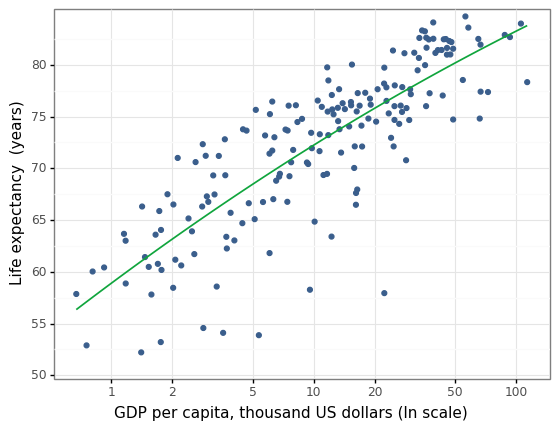

<ggplot: (312888330)>

In [30]:
ggplot(xc, aes(x="gdppc", y="lifeexp")) + geom_point(color=color[0]) + stat_smooth(
    color=color[1], method="lm", formula="y ~ poly(x,2)", se=False, size=0.7
) + coord_cartesian(ylim=(50, 85)) + scale_x_continuous(
    trans=transforms.log_trans(), breaks=(0.1, 0.5, 1, 2, 5, 10, 20, 50, 100)
) + scale_y_continuous(
    expand=(0.01, 0.01), breaks=seq(50, 85, by=5)
) + labs(
    x="GDP per capita, thousand US dollars (ln scale) ", y="Life expectancy  (years)"
) + theme_bw()

In [31]:
# WEIGHTED AND UNWEIGHTED REGRESSION
########################################

In [32]:
reg7=smf.ols(formula='lifeexp ~ lngdppc',data=xc)
reg7.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                lifeexp   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     382.8
Date:                Tue, 30 Mar 2021   Prob (F-statistic):           2.00e-46
Time:                        16:29:44   Log-Likelihood:                -524.28
No. Observations:                 182   AIC:                             1053.
Df Residuals:                     180   BIC:                             1059.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     59.6593      0.722     82.628      0.000      58.235      61.084
lngdppc        5.3336      0.273     19.565      0.000       4.796       5.872
==============================================================================
Omnibus:                       40.029   Durbin-Watson:                   2.238
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               68.168
Skew:                          -1.116   Prob(JB):                     1.58e-15
Kurtosis:                       5.002   Cond. No.                         6.65
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
reg7=smf.wls(formula='lifeexp ~ lngdppc',data=xc,weights=xc.population)
reg7.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                lifeexp   R-squared:                       0.662
Model:                            WLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     351.9
Date:                Tue, 30 Mar 2021   Prob (F-statistic):           3.23e-44
Time:                        16:29:44   Log-Likelihood:                -659.24
No. Observations:                 182   AIC:                             1322.
Df Residuals:                     180   BIC:                             1329.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     58.7179      0.775     75.716      0.000      57.188      60.248
lngdppc        5.7529      0.307     18.760      0.000       5.148       6.358
==============================================================================
Omnibus:                      159.074   Durbin-Watson:                   2.114
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5085.737
Skew:                          -2.901   Prob(JB):                         0.00
Kurtosis:                      28.239   Cond. No.                         7.82
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

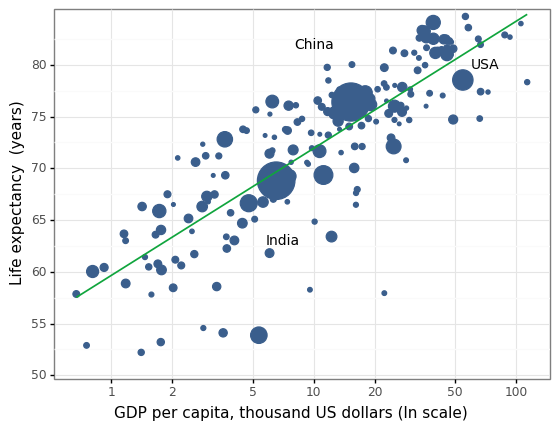

<ggplot: (313291939)>

In [34]:
ggplot(xc, aes(x="gdppc", y="lifeexp")) + geom_point(
    xc, aes(size="population"), color=color[0], alpha=0.6, show_legend=False
) + geom_smooth(
    aes(weight="population"), method="lm", color=color[1], se=False, size=0.7
) + scale_size(
    range=(1, 15)
) + coord_cartesian(
    ylim=(50, 85)
) + scale_x_continuous(
    trans=transforms.log_trans(), breaks=(0.1, 0.5, 1, 2, 5, 10, 20, 50, 100)
) + scale_y_continuous(
    expand=(0.01, 0.01), breaks=seq(50, 85, by=5)
) + labs(
    x="GDP per capita, thousand US dollars (ln scale) ", y="Life expectancy  (years)"
) + theme_bw() + annotate(
    "text", x=70, y=80, label="USA", size=10
) + annotate(
    "text", x=10, y=82, label="China", size=10
) + annotate(
    "text", x=7, y=63, label="India", size=10
)

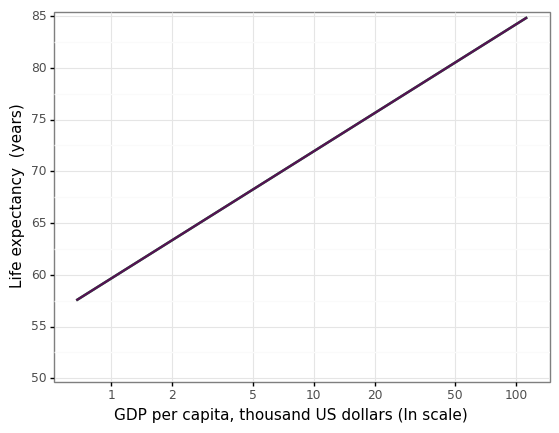

<ggplot: (313294195)>

In [35]:
#### weighting is not working
ggplot(xc, aes(x="gdppc", y="lifeexp")) + geom_smooth(
    method="lm", color=color[1], se=False, size=1
) + geom_smooth(
    aes(weight="population"),method="lm", color=color[2], se=False, size=1
) + scale_size(
    range=(1, 15)
) + coord_cartesian(
    ylim=(50, 85)
) + scale_x_continuous(
    trans=transforms.log_trans(), breaks=(0.1, 0.5, 1, 2, 5, 10, 20, 50, 100)
) + scale_y_continuous(
    expand=(0.01, 0.01), breaks=seq(50, 86, by=5)
) + labs(
    x="GDP per capita, thousand US dollars (ln scale) ", y="Life expectancy  (years)"
) + theme_bw()

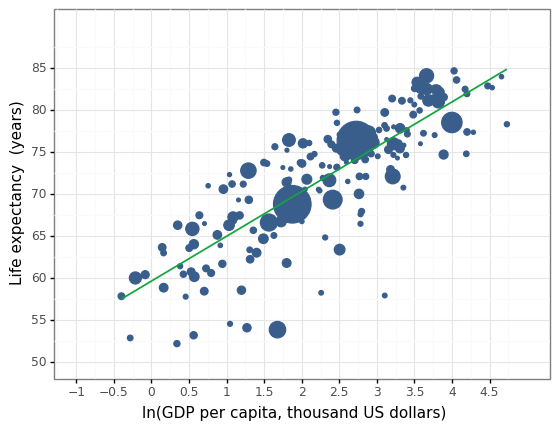

<ggplot: (313333598)>

In [36]:
ggplot(xc, aes(x="lngdppc", y="lifeexp")) + geom_point(
    xc, aes(size="population"), color=color[0], alpha=0.4, show_legend=False
) + geom_smooth(
    aes(weight="population"), method="lm", color=color[1], se=False, size=0.7
) + scale_size(
    range=(1, 15)
) + coord_cartesian(
    xlim=(-1, 5), ylim=(50, 90)
) + scale_x_continuous(
    breaks=seq(-1, 5, by=0.5)
) + scale_y_continuous(
    breaks=seq(50, 90, by=5)
) + labs(
    x="ln(GDP per capita, thousand US dollars)",
    y="Life expectancy  (years)",
    size="Population",
) + theme_bw()